In [51]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import  Image


(432, 600)


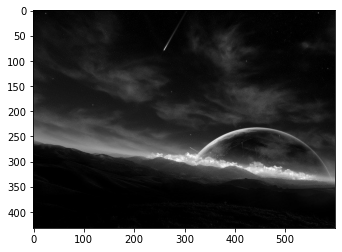

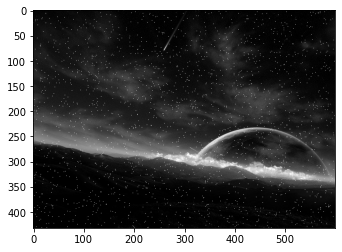

In [58]:
def read_picmode(figpath,mode='rgb'):#決定讀取黑白還彩色
    if (mode=='rgb'):
        pic=cv2.imread(figpath)
        pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
    elif (mode=='gray'):
        pic=cv2.imread(figpath, cv2.IMREAD_GRAYSCALE)
    return pic
pic=read_picmode('picdir/dark.jpg',mode='gray')
print(pic.shape)

box_filter=1/9*np.array([[1,1,1],[1,1,1],[1,1,1]])
Gaussian_Filter=1/16*np.array([[1,2,1],[2,4,2],[1,2,1]])
sobel_filter_h=np.array([[1,0,-1],[2,0,2],[1,0,-1]])
sobel_filter_w=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
Laplacian_Filters=np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
zoomsize=4
# pic1 = cv2.resize(pic1,(int(pic1.shape[1]/zoomsize),int(pic1.shape[0]/zoomsize)) , interpolation=cv2.INTER_AREA)

#只能加在黑白圖
def add_noise(img,n):
    noice_pic=np.array(img)
    for _ in range(n):
        x = int(np.random.random() * img.shape[0])
        y = int(np.random.random() * img.shape[1])
        noice_pic[x, y] = 255 # 白色的灰階值是 255
    return noice_pic
noice_pic=add_noise(pic,2000)
plt.imshow(pic,cmap='gray')
plt.show()
plt.imshow(noice_pic,cmap='gray')


In [43]:
#原始算法
kernel_size=Gaussian_Filter.shape[0]
new_img_hsize=img_hsize-kernel_size+1
new_img_wsize=img_wsize-kernel_size+1
new_img=np.zeros((new_img_hsize,new_img_wsize,3))#準備新圖片
print(new_img.shape)

#經典雙迴圈作法

for i in range (new_img.shape[0]):
    for j in range (new_img.shape[1]):
        print('i:',i,'j:',j)
        value=0
        for ki in range(kernel_size):
            for kj in range (kernel_size):
                value +=pic1[i+ki][j+kj]*Gaussian_Filter[ki][kj]
        print(value)
        new_img[i][j][0]=value[0]
        new_img[i][j][1]=value[1]
        new_img[i][j][2]=value[2]

        



NameError: name 'img_hsize' is not defined

In [67]:
#改良原始算法
def convolution(img, kernel):
    row_vector=kernel.flatten()
    kernel_size=kernel.shape[0]
    img_hsize=img.shape[0]
    img_wsize=img.shape[1]
    new_img_hsize=img_hsize-kernel_size+1
    new_img_wsize=img_wsize-kernel_size+1
    new_img=np.zeros((new_img_hsize,new_img_wsize,3)) #準備新圖片
    for i in range (new_img.shape[0]):#垂直方向
        for j in range (new_img.shape[1]):#水平方向
            value = 0
            column_vector = []
            for ki in range(kernel_size):
                for kj in range(kernel_size):
                    column_vector.append(img[i+ki][j+kj]) # 從 img 中取出數值放入 column_vector
            new_img[i][j] = row_vector @ column_vector #@為內積運算
    new_img=new_img.astype(int)
    return new_img
#now only for gray pic
def median_filter(img,filter_size):
    temp = []
    indexer = filter_size // 2 #ex: 5//2=2 3//2=1
    #data_final = []
    data_final = np.zeros(((img.shape[0]),(img.shape[1])))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):

            for z in  range(filter_size):
                if i+z-indexer<0 or i+z-indexer>(img.shape[0])-1 :#超過圖像寬度
                    for c in range(filter_size):
                        temp.append(0)
                else :
                    if j+z-indexer<0 or j+indexer>(img.shape[1])-1:
                        temp.append(0)
                    else :
                        for k in range(filter_size):
                            temp.append(img[i+z-indexer][j+k-indexer])
            temp.sort()
            data_final[i][j]=temp[len(temp)//2]
            temp.clear()
    return data_final
median_filter_pic=median_filter(noice_pic,3)
def mean_filter(img,filter_size):
    data_final=np.zeros(((img.shape[0]),(img.shape[1])))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pass

    
    
                  



KeyboardInterrupt: 

In [66]:

gaussin_pic=convolution(noice_pic,Gaussian_Filter)
laplace_pic=convolution(noice_pic,Laplacian_Filters)


KeyboardInterrupt: 

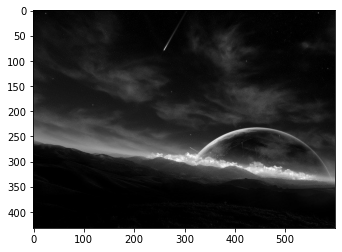

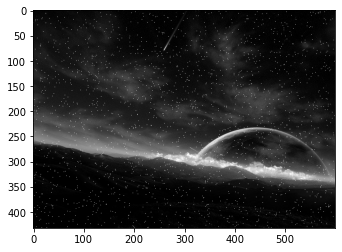

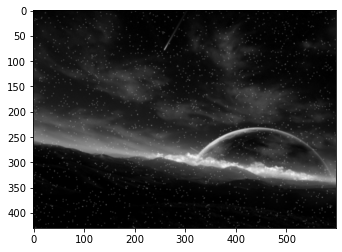

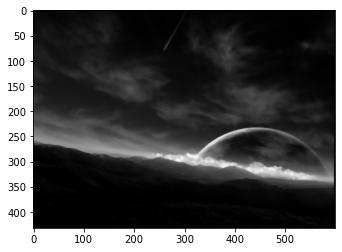

In [61]:
plt.imshow(pic,cmap='gray')
plt.show()
plt.imshow(noice_pic,cmap='gray')
plt.show()
plt.imshow(gaussin_pic,cmap='gray')
plt.show()
plt.imshow(median_filter_pic,cmap='gray')

ValueError: operands could not be broadcast together with shapes (432,600) (430,598,3) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


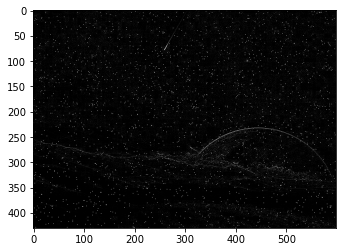

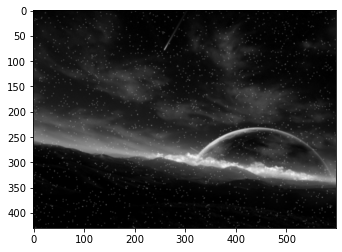